Elapsed time: 0.000488600000153383


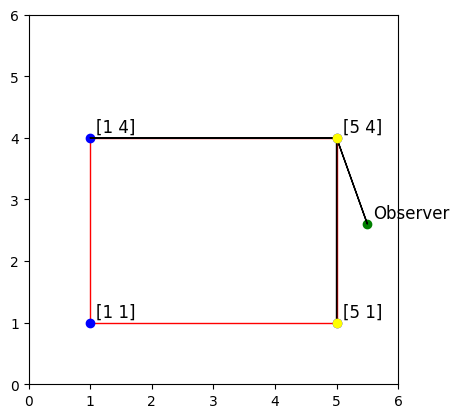

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Define a function to check visibility of corners
def get_visible_corners(observer, corners):
    # Get vectors from observer to corners
    cv = corners - observer
    
    # Sort the corners by length of observer to corner vector
    cv_lengths = np.linalg.norm(cv, axis=1)
    sorted_indices = np.argsort(cv_lengths)
    
    # Find index of smallest observer to corner vector (closest corner)
    min_idx = np.argmin(np.linalg.norm(cv, axis=1))
    vmin = cv[min_idx] # Index of closest corner
    vmin_replicated = np.tile(vmin, (2, 1)) # Tile down once to compute cross product
    vmin_to_neighbors = cv[[(min_idx - 1) % len(corners), (min_idx + 1) % len(corners)], :] - cv[min_idx] # Vectors from closest corner to previous and next corners
    
    # Take the cross product between the obs to mean and mean to neighbors vectors
    crosses = np.cross(vmin_replicated, vmin_to_neighbors)
    
    # If cross products are opposite signs, the observer has view of the three closest corners
    if np.any(crosses > 0) and np.any(crosses < 0):
        return vmin, *vmin_to_neighbors, corners[sorted_indices[:3]]
    
    # Otherwise, the observer has view of the closest corner and one of the neighbors
    else:
        # The mean is the first observable corner
        # The visible neighbor of the mean is the one that is less aligned with the obs to mean vector
        # This can be computed by taking the smaller dot product between the obs to mean vector and the obs to neighbor vectors
        
        # Normalize to unit vectors
        unit_vmin = vmin / np.linalg.norm(vmin)
        unit_vmin_to_neighbors = vmin_to_neighbors / np.linalg.norm(vmin_to_neighbors, axis=1)[:, np.newaxis]
        
        # Find the smallest dot product
        dot_products = unit_vmin_to_neighbors @ unit_vmin # Dot product between obs to mean and obs to neighbors
        smallest_dot_idx = np.argmin(dot_products) # Index of smallest dot product
        observable_corners = np.vstack((corners[min_idx], # Closest corner
                                       corners[min_idx] + vmin_to_neighbors[smallest_dot_idx])) # Closest corner and the observable neighbor
        
        return vmin, *vmin_to_neighbors, observable_corners


# Define the corners of the rectangle
corners = np.array([[1, 1], [5, 1], [5, 4], [1, 4]])

# Define an observer position
observer = np.array([5.5, 2.6])

# Get visible corners
start_time = timeit.default_timer()
vmin, v1, v2, observable_corners= get_visible_corners(observer, corners)
print('Elapsed time:', timeit.default_timer() - start_time)
# Plot the rectangle and observer position
rectangle = plt.Polygon(corners, fill=None, edgecolor='r')
plt.gca().add_patch(rectangle)

# Plot the corners
for corner in corners:
    plt.scatter(*corner, color='blue')
    plt.text(corner[0] + 0.1, corner[1] + 0.1, f'{corner}', fontsize=12)

# Plot the observer position
plt.scatter(*observer, color='green')
plt.text(observer[0] + 0.1, observer[1] + 0.1, 'Observer', fontsize=12)

# Plot the vectors from their corresponding locations
plt.arrow(*observer, *vmin)
plt.arrow(*(observer+vmin), *v1)
plt.arrow(*(observer+vmin), *v2)

# Highlight visible corners
for corner in observable_corners:
    plt.scatter(*corner, color='yellow')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


0.0016838000010466203 on previous shapely method

0.0002701999983401038 new method

In [35]:
old_time = 0.0016838000010466203 # on previous shapely method

new_time = 0.000488600000153383 # new method

print(f"Speedup: {old_time/new_time:.2f}x")

Speedup: 3.45x


: 